In [2]:
import numpy as np
import pandas as pd
import sklearn as sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
dataset = pd.read_csv(r"/Users/avishekbanerji/Desktop/database.csv")
dataset.head() 

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [5]:
attributes=(list(dataset))
attributes

['Record ID',
 'Incident Year',
 'Incident Month',
 'Incident Day',
 'Operator ID',
 'Operator',
 'Aircraft',
 'Aircraft Type',
 'Aircraft Make',
 'Aircraft Model',
 'Aircraft Mass',
 'Engine Make',
 'Engine Model',
 'Engines',
 'Engine Type',
 'Engine1 Position',
 'Engine2 Position',
 'Engine3 Position',
 'Engine4 Position',
 'Airport ID',
 'Airport',
 'State',
 'FAA Region',
 'Warning Issued',
 'Flight Phase',
 'Visibility',
 'Precipitation',
 'Height',
 'Speed',
 'Distance',
 'Species ID',
 'Species Name',
 'Species Quantity',
 'Flight Impact',
 'Fatalities',
 'Injuries',
 'Aircraft Damage',
 'Radome Strike',
 'Radome Damage',
 'Windshield Strike',
 'Windshield Damage',
 'Nose Strike',
 'Nose Damage',
 'Engine1 Strike',
 'Engine1 Damage',
 'Engine2 Strike',
 'Engine2 Damage',
 'Engine3 Strike',
 'Engine3 Damage',
 'Engine4 Strike',
 'Engine4 Damage',
 'Engine Ingested',
 'Propeller Strike',
 'Propeller Damage',
 'Wing or Rotor Strike',
 'Wing or Rotor Damage',
 'Fuselage Strike',
 '

In [6]:
species = dataset["Species Name"]
species_count=species.value_counts()
print(species_count)

UNKNOWN MEDIUM BIRD           38531
UNKNOWN SMALL BIRD            32981
MOURNING DOVE                  7653
GULL                           6580
UNKNOWN BIRD                   6400
                              ...  
PIPING PLOVER                     1
CUCKOOS, ROADRUNNERS, ANIS        1
RED-LEGGED PARTRIDGE              1
TOWHEES                           1
YUMA MYOTIS                       1
Name: Species Name, Length: 715, dtype: int64


In [7]:
top_known_species = ["MOURNING DOVE", "GULL","KILLDEER", "AMERICAN KESTREL","BARN SWALLOW"]
top_known_species = species[species.isin(top_known_species)]
print(top_known_species.value_counts())


MOURNING DOVE       7653
GULL                6580
KILLDEER            4562
AMERICAN KESTREL    4476
BARN SWALLOW        4215
Name: Species Name, dtype: int64


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

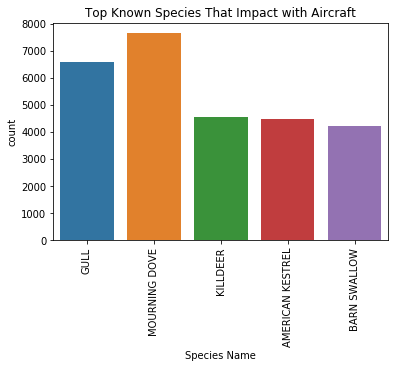

In [8]:
sns.countplot(top_known_species)
plt.title("Top Known Species That Impact with Aircraft")
plt.xticks(rotation='vertical')

In [9]:
damage=[]
strike=[]
dam=".*Damage$"
stri=".*Strike$"
for i in attributes:
    if (re.match(dam, i)):
        damage.append(i)
    elif (re.match(stri, i)):
        strike.append(i)

In [10]:
damage

['Aircraft Damage',
 'Radome Damage',
 'Windshield Damage',
 'Nose Damage',
 'Engine1 Damage',
 'Engine2 Damage',
 'Engine3 Damage',
 'Engine4 Damage',
 'Propeller Damage',
 'Wing or Rotor Damage',
 'Fuselage Damage',
 'Landing Gear Damage',
 'Tail Damage',
 'Lights Damage',
 'Other Damage']

In [11]:
damage=damage[1:]
damage

['Radome Damage',
 'Windshield Damage',
 'Nose Damage',
 'Engine1 Damage',
 'Engine2 Damage',
 'Engine3 Damage',
 'Engine4 Damage',
 'Propeller Damage',
 'Wing or Rotor Damage',
 'Fuselage Damage',
 'Landing Gear Damage',
 'Tail Damage',
 'Lights Damage',
 'Other Damage']

In [12]:
damage_y=[]
strike_y=[]
for i in strike:
    strike_y.append(dataset[i].sum())

for i in damage:
    damage_y.append(dataset[i].sum())

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

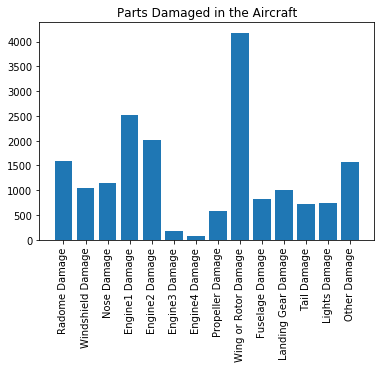

In [13]:
plt.bar(damage,damage_y)
plt.title("Parts Damaged in the Aircraft")
plt.xticks(rotation='vertical')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

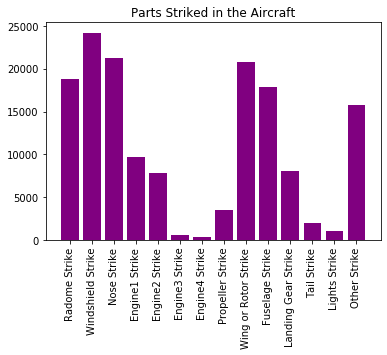

In [14]:
plt.bar(strike,strike_y,color='purple')
plt.title("Parts Striked in the Aircraft")
plt.xticks(rotation='vertical')

In [15]:
damage_per_strike=[]
parts=[]
for i in range(0,len(strike)):
    damage_per_strike.append(damage_y[i]/strike_y[i])
    parts.append(strike[i][:-7])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text xticklabel objects>)

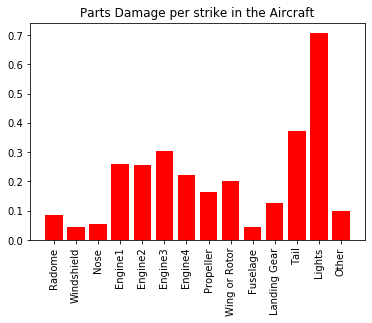

In [16]:
plt.bar(parts,damage_per_strike,color='red')
plt.title("Parts Damage per strike in the Aircraft")
plt.xticks(rotation='vertical')